In [ ]:
from google.colab import drive
drive.mount('/content/gdrive/', force_remount=True)

Mounted at /content/gdrive/


In [7]:
import numpy as np
import time
import itertools
import os
import tensorflow as tf
import tensorflow_hub as hub
import shutil
import PIL
import tqdm

from tqdm import tqdm
from random import random
from ipywidgets import Image
from numpy.linalg import norm
from IPython.display import display
from keras.models import Model
from sklearn.metrics import classification_report

# tensorflow version 2.4.0
from tensorflow import keras

In [ ]:
FISH_BREEDS = 9
IMAGE_SIZE = (224, 224)
BATCH_SIZE = 32

In [ ]:
BASE_DIR = "/content/gdrive/Shareddrives/MIRCV"
IMAGES_DIR = "/content/gdrive/MyDrive/MIRCV"

In [ ]:
! pip install -q kaggle

from google.colab import files
_ = files.upload()

! mkdir -p ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json


In [ ]:
! kaggle datasets download -d crowww/a-large-scale-fish-dataset --unzip

100% 3.24G/3.24G [00:21<00:00, 189MB/s]
100% 3.24G/3.24G [00:21<00:00, 161MB/s]


Let's install whoosh, a pure Python library for building textual search engines.

In [ ]:
!pip install whoosh

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 468 kB 5.0 MB/s 


# IVFADC

*The database vectors are separated into k' partitions. The partitioning is done through k-means clustering, producing what we called the coarse quantizer.*

*Each partition is represented and defined by a partition centroid, and each vector can only belong to one partition.*

*We will use centroid, original vector and residual vector.
The residual vector is nothing more than the difference between the original vector and the centroid.*

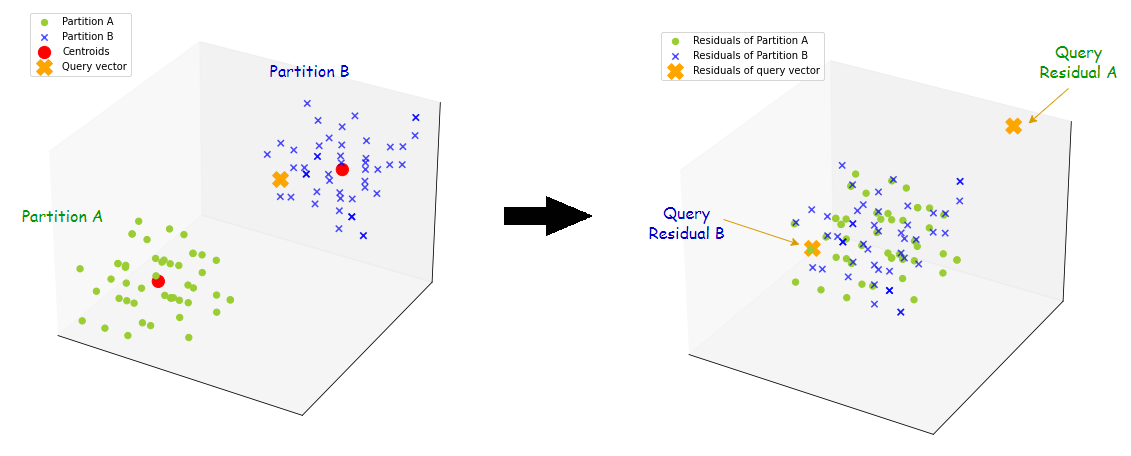
*By taking the residuals, the data points from both partitions have virtually repositioned to the same space centered around the origin, and are overlapping with one another. This is very different from the first plot where the two partitions are seen to be isolated from one another.*

In [ ]:
from pathlib import Path

import pandas as pd
from tqdm.auto import tqdm

import whoosh.analysis
import whoosh.fields
import whoosh.index
import whoosh.qparser